<a href="https://colab.research.google.com/github/frankgama/CS111-Intro-to-Scientific-Computing/blob/main/Homework3Missles_Vibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 3 Least-Squares Missles

In this homework we will apply the methods of least-squares to find a line of best fit for the parabola of a missle given initial data. We will use functions from CS111 libraries as well as built Numpy and Matplotlib


In [ ]:
#Homework 3 COMPSCI 111 UCSB Summer 2025, Frank Gama
#I confirm that I did not use ChatGPT
#or codes from the web or from past years’ assignments and that the work
#I submit is my own and my own only.

#I have been using Google colab since this is the easiest for me at the moment

import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
np.set_printoptions(precision = 4)

#I have to connect my colab to my drive every time I make a project
from google.colab import drive
drive.mount('/content/drive/')

# Now that I am connected, I need to be able to access the CS111 File and its
# contents
import os, sys, pathlib
PKG_NAME = "CS111"
PKG_DIR = f"/content/drive/MyDrive/{PKG_NAME}"
PARENT = os.path.dirname(PKG_DIR)




#this makes sure I connected correctly and that my kernel has access to my files
if PARENT not in sys.path:
    sys.path.insert(0, PARENT)

import cs111.LU as LU

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#1 we will find the line of best fit for the parabola
#so we build an array for our data so we can plot it and use our least-squares
#method and approximation

#position
t = np.array( [0.00, 0.25, 0.50, 0.75, 1.00] )
#height
y = np.array( [0.00, 0.008, 0.015, 0.019, 0.020] )
print( "position:", p )
print( "height:", h )

#we want to build our matrix A for Ax = y where x = [a, b, c]^T.
#we are given y and t. So we will build the matrices

A = np.column_stack([np.ones_like(t), t, t**2])

print("A:\n", A)
print("y:\n", y)


position: [0.   0.25 0.5  0.75 1.  ]
height: [0.    0.008 0.015 0.019 0.02 ]
A:
 [[1.     0.     0.    ]
 [1.     0.25   0.0625]
 [1.     0.5    0.25  ]
 [1.     0.75   0.5625]
 [1.     1.     1.    ]]
y:
 [0.    0.008 0.015 0.019 0.02 ]


In [ ]:
#Since it is overdetermined, we will now solve for least squares for
# (A^T A)x = A^T y with our LU functions and we print the relative residual
#norm

ATA = A.T @ A

ATy = A.T @ y

x, _ = LU.LUsolve(ATA, ATy)
a,b,c = x
print ("x = [a,b,c] ^T = ", x)

relres = np.linalg.norm(A @ x - y) / np.linalg.norm(y)
print("Relative residual norm =", relres)


x = [a,b,c] ^T =  [-0.0002  0.0398 -0.0194]
Relative residual norm = 0.020865621238292043


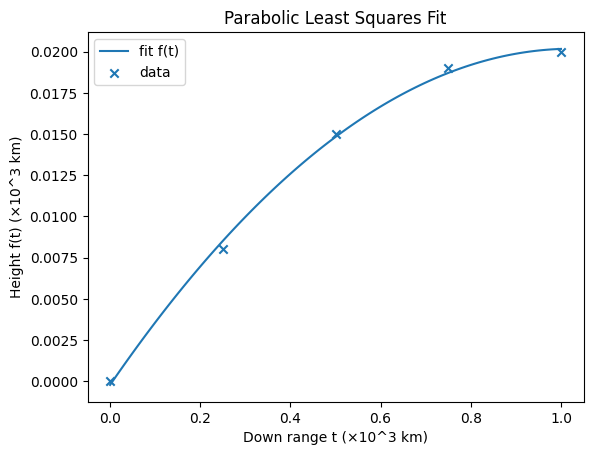

In [ ]:
#X gives us the the parabola f(t) = a + bt + ct^2. the relative residual is
#small so its a good fit. So we plot and show the line of best fit

tt = np.linspace(t.min(), t.max(), 100)
yfit = a + b*tt + c*tt**2
plt.plot(tt, yfit, label="fit f(t)")
plt.scatter(t, y, marker="x", label="data")
plt.xlabel("Down range t (×10^3 km)")
plt.ylabel("Height f(t) (×10^3 km)")
plt.title("Parabolic Least Squares Fit")
plt.legend(); plt.show()

In [ ]:
#now for the landing

In [ ]:
roots = np.roots([c, b, a])  # c t^2 + b t + a = 0
real_roots = []
for r in roots:
    if abs(r.imag) < 1e-10:
        real_roots.append(r.real)
print("Real roots:", real_roots)

landing = max(real_roots)
print("roots:", roots)
print("landing (×10^3 km):", landing)

Real roots: [np.float64(2.0442449627629484), np.float64(0.005755037237050189)]
roots: [2.0442 0.0058]
landing (×10^3 km): 2.0442449627629484


Homework 3 - Vibrations, we will demonstrate our understanding of eigen decomposition for a coupled undamped harmonic oscillator system.

In [ ]:
#We have a system of ODEs so we take our data and build a matrix like the
#earthquake example in class. Since we are using Newton's secod law of motion
#we have Mx'' + Kx = 0, where M and K and this is the genearl form of an undamped
#harmonic oscillator system.

m1, m2, m3 = 40.0, 20.0, 30.0

k1, k2, k3, k4 = 200.0, 100.0, 150.0, 250.0

M = np.diag([m1, m2, m3])
K = np.array([[k1+k2,   -k2,      0.0],
              [  -k2, k2+k3,   -k3  ],
              [  0.0,   -k3,  k3+k4]], dtype=float)
print("M =\n", M)
print("K =\n", K)

M =
 [[40.  0.  0.]
 [ 0. 20.  0.]
 [ 0.  0. 30.]]
K =
 [[ 300. -100.    0.]
 [-100.  250. -150.]
 [   0. -150.  400.]]


In [ ]:
#we solve for M^-1Kv = lambdav and take omega = sqrt(lambda)
#just like in class, where lambda is the eigenvalue

MinvK = np.linalg.solve(M, K)
eigvals, eigvecs = np.linalg.eig(MinvK)

eigvals = eigvals.real
eigvecs = eigvecs.real
omega = np.sqrt(np.maximum(eigvals, 0.0))

order = np.argsort(omega)
omega = omega[order]
V = eigvecs[:, order]

print("Natural frequencies ω (rad/s):")
for i, w in enumerate(omega, 1):
    print(f"  ω_{i} = {w:.6f}")

Natural frequencies ω (rad/s):
  ω_1 = 2.086312
  ω_2 = 3.069388
  ω_3 = 4.422612


In [ ]:
#we then normalize and scare each to magnitude 1.
Vn = V / np.max(np.abs(V), axis=0, keepdims=True)
print("Mode shapes (columns, normalized):\n", Vn)

Mode shapes (columns, normalized):
 [[ 0.7943 -1.      0.2073]
 [ 1.      0.7685 -1.    ]
 [ 0.5568  0.9821  0.8031]]


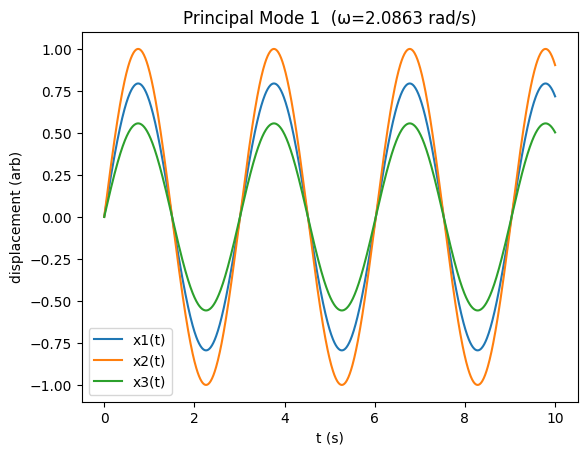

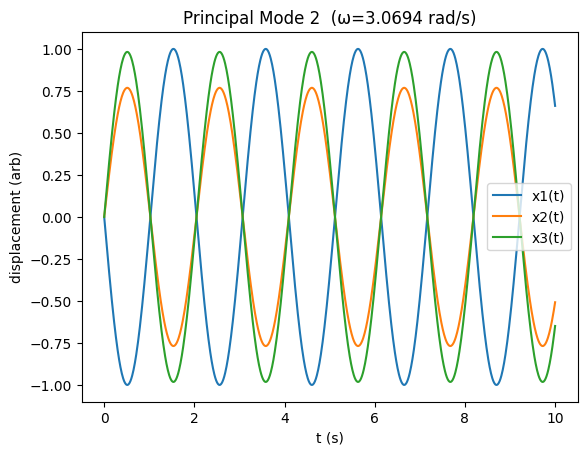

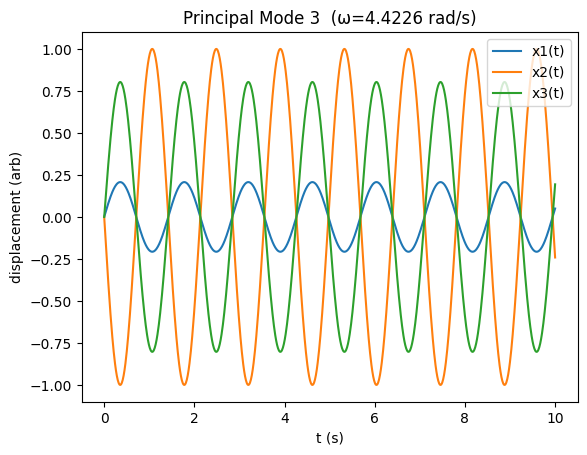

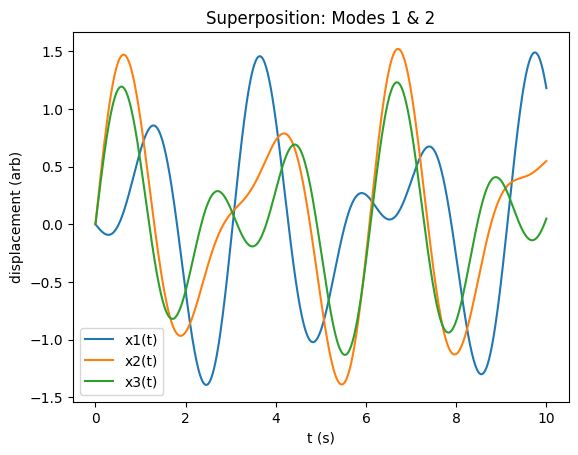

In [ ]:
#we now plat x(t) = v_i sin(omega_i *t) for each mode
#to visualize relative motion of the masses

t = np.linspace(0.0, 10.0, 1000)

for i in range(3):
    X = Vn[:, [i]] * np.sin(omega[i] * t)[None, :]
    plt.figure()
    plt.plot(t, X[0], label='x1(t)')
    plt.plot(t, X[1], label='x2(t)')
    plt.plot(t, X[2], label='x3(t)')
    plt.title(f'Principal Mode {i+1}  (ω={omega[i]:.4f} rad/s)')
    plt.xlabel('t (s)'); plt.ylabel('displacement (arb)')
    plt.legend(); plt.show()

alpha, beta = 1.0, 0.7
t = np.linspace(0.0, 10.0, 1000)
Xsup = alpha*Vn[:, [0]]*np.sin(omega[0]*t)[None,:] + beta*Vn[:, [1]]*np.sin(omega[1]*t)[None,:]

plt.figure()
plt.plot(t, Xsup[0], label='x1(t)')
plt.plot(t, Xsup[1], label='x2(t)')
plt.plot(t, Xsup[2], label='x3(t)')
plt.title('Superposition: Modes 1 & 2')
plt.xlabel('t (s)'); plt.ylabel('displacement (arb)')
plt.legend(); plt.show()

For this problem we modeled a 3-mass, 4-spring undamped oscillator. We used Newton’s second law to write the system as Mx'' + Kx = 0 and then solved it with eigen decomposition. The eigenvalues gave us the natural frequencies and the eigenvectors gave us the mode shapes. Finally, we plotted x(t) = v sin(ωt) to see how each mass moves in time.